# IPL Story

### importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### loading dataset

In [2]:
matches = pd.read_csv('ipl/matches.csv')
deliveries = pd.read_csv('ipl/deliveries.csv')
matches.rename(columns={'id':'match_id'}, inplace=True)

### generating merged Data

In [3]:
merged_data = pd.merge(matches, deliveries, on='match_id')

In [4]:
def bowler_wicket_team_sess (df, sess, team, top, season_flag =True, team_flag=True):
    ## df = the dataFrame passed
    ## sess = The season for which you need the statistics
    ## team = team for which you need the statistics
    ## top = number of players for which you need the stats, sorted in descending
    
    ## collecting unecessary columns
    droplist=[]
    for x in df.columns:
        if x != 'season' and x != 'batting_team' and x != 'bowling_team' and x!= 'bowler' and x!='player_dismissed':
            droplist.append(x)

    ## removing unecessary columns
    df_local = df.drop(droplist,axis=1)
    
    ## selecting out the part which satisfy team name, season provided
    if season_flag == True: df_local=df_local[df_local.season==sess]
    if team_flag == True: df_local=df_local[df_local.bowling_team==team]
    
    df_local = df_local.groupby('bowler')['player_dismissed'].count()
    
    ## sorting out to get the top 
    df_local.sort_values(inplace=True,ascending= False)
    df_local=df_local[0:top+1]
    
    ## generating title
    title_ = team + ' ' + str(sess)
    
    
    ## plotting total runs and boundaries for top batsman
    df_local.plot(kind='bar',title=title_)
    plt.ylabel('Number of wickets')
    plt.show()
    

In [5]:
def bowler_wicket_overall(merged_data, top, season_flag=False, team_flag=False):
    bowler_wicket_team_sess (merged_data, 'All Season', 'All Team', top, season_flag, team_flag)

In [6]:
def bowler_wicket_acrossTeam_sess(merged_data, sess, top, season_flag=True, team_flag=False):
    bowler_wicket_team_sess (merged_data, sess, 'All Team', top, season_flag, team_flag)

In [7]:
def bowler_wicket_team_acrossSess(merged_data, team, top, season_flag=False, team_flag=True):
    bowler_wicket_team_sess (merged_data, 'All Season', team, top, season_flag, team_flag)

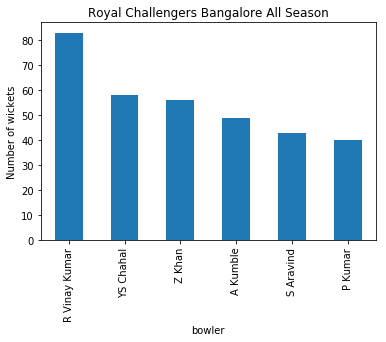

In [9]:
bowler_wicket_team_acrossSess(merged_data,'Royal Challengers Bangalore',5)

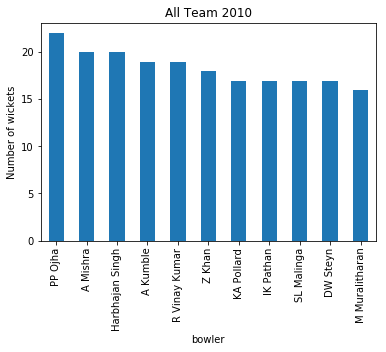

In [10]:
bowler_wicket_acrossTeam_sess(merged_data,2010,10)

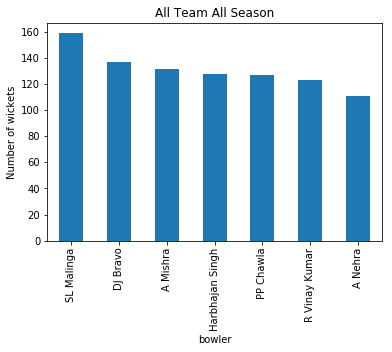

In [12]:
bowler_wicket_overall(merged_data,6)

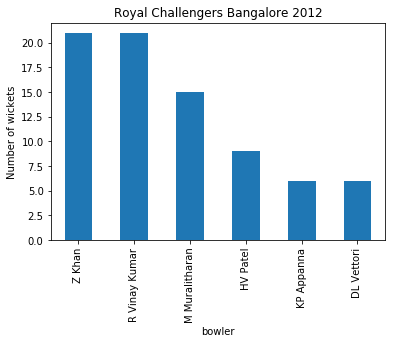

In [13]:
bowler_wicket_team_sess(merged_data, 2012, 'Royal Challengers Bangalore', 5)

In [14]:
def batsman_score_team_sess (df, sess, team, top, season_flag =True, team_flag=True):
    ## df = the dataFrame passed
    ## sess = The season for which you need the statistics
    ## team = team for which you need the statistics
    ## top = number of players for which you need the stats, sorted in descending
    
    ## collecting unecessary columns
    droplist=[]
    for x in df.columns:
        if x != 'season' and x != 'batting_team' and x != 'batsman' and x!= 'batsman_runs':
            droplist.append(x)

    ## removing unecessary columns
    df_local = df.drop(droplist,axis=1)
    
    ## selecting out the part which satisfy team name, season provided
    if season_flag == True: df_local=df_local[df_local.season==sess]
    if team_flag == True: df_local=df_local[df_local.batting_team==team]
    
    ## calculating score by each individual batsman
    df_local = pd.crosstab(df_local.batsman, df_local.batsman_runs)
    
    
    ## calculating other interesting stuff, sixes hit, fours
    tot_run=[]
    fours=[]
    sixes=[]
    for row in df_local.index:
        tot_run.append((df_local.loc[row,:] * df_local.columns).sum())
        fours.append((df_local.loc[row,4]).sum())
        sixes.append((df_local.loc[row,6]).sum())
    
    ## adding fours, sixes and total boundaries to dataFrame
    df_local['total_runs']=tot_run
    df_local['fours']=fours
    df_local['sixes']=sixes
    df_local['boundaries']=df_local['fours']+df_local['sixes']
    
    ## collecting out unecessary columns from dataFrame 
    droplist=[]
    for x in df_local.columns:
        if x != 'total_runs' and x != 'fours' and x != 'sixes' and x!= 'boundaries':
            droplist.append(x)
    
    ## dropping out unecessary columns from dataFrame 
    
    df_local.drop(droplist,inplace=True,axis=1)
    
    ## sorting out to get the top 
    df_local.sort_values(by='total_runs',inplace=True,ascending= False)
    df_local=df_local.iloc[0:top+1,:]
    
    ## generating title
    title_ = team + ' ' + str(sess)
    
    ## plotting total runs and boundaries for top batsman
    df_local.loc[:,['total_runs','boundaries']].plot(kind='bar',title=title_)
    plt.show()
    
    ## plotting number of fours and sixes for top batsman
    df_local.loc[:,['fours','sixes']].plot(kind='bar',subplots=True)
    plt.show()
    
    

In [15]:
def batsman_score_overall(merged_data, top, season_flag=False, team_flag=False):
    batsman_score_team_sess(merged_data, 'All Season', 'All Team', top, season_flag, team_flag)
    

In [16]:
def batsman_score_acrossTeam_sess(merged_data, sess, top, season_flag=True, team_flag=False):
    batsman_score_team_sess(merged_data, sess, 'All Team', top, season_flag, team_flag)

In [17]:
def batsman_score_team_acrossSess(merged_data, team, top, season_flag=False, team_flag=True):
    batsman_score_team_sess(merged_data, 'All Season', team, top, season_flag, team_flag)

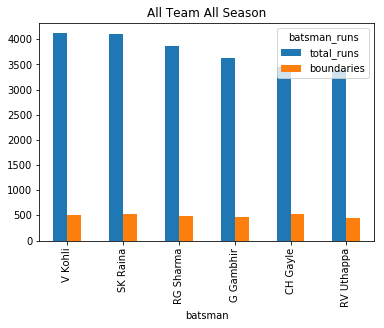

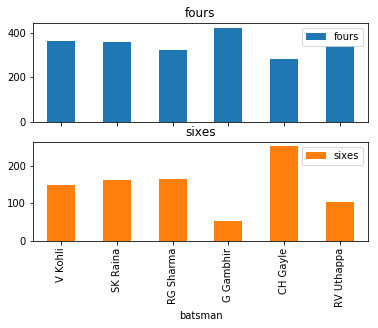

In [18]:
batsman_score_overall(merged_data, 5)

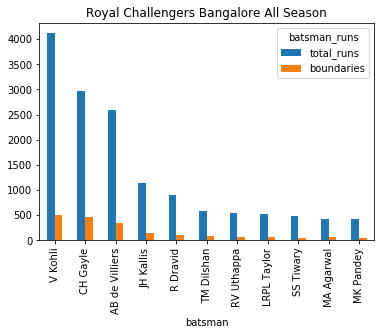

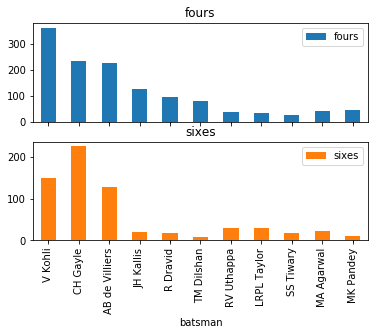

In [19]:
batsman_score_team_acrossSess(merged_data, 'Royal Challengers Bangalore',10)

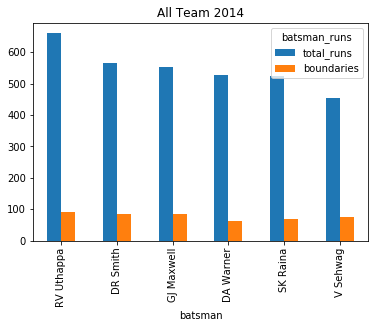

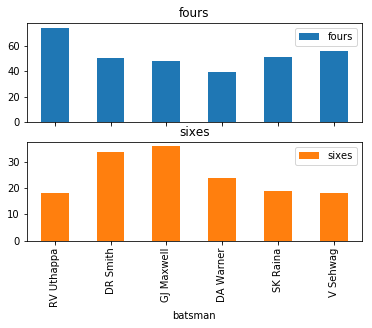

In [24]:
batsman_score_acrossTeam_sess(merged_data, 2014, 5)